# *Elements of Statistical Learning* - Exercise 2.8

> **Author**: Lorenzo BATTARRA
>
> **Last reviewed**: 2019/12/07

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Add `pyesl` path

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

In [3]:
data_dir = '../../Data/'

## 1. Loading data

In [4]:
# usecols is needed as there are trailing spaces, hence a column filled with NaNs

zip_train = pd.read_csv(os.path.join(data_dir, 'zip.train.gz'), header=None, sep=' ', usecols=list(range(257)))
zip_test = pd.read_csv(os.path.join(data_dir, 'zip.test.gz'), header=None, sep=' ', usecols=list(range(257)))

In [5]:
# filter out only the 2's and the 3's

zip_train = zip_train.loc[(zip_train[0] == 2) | (zip_train[0] == 3)]
zip_test = zip_test.loc[(zip_test[0] == 2) | (zip_test[0] == 3)]

In [6]:
# extract responses: column 0

zip_train_Y = np.array(zip_train[0])
zip_test_Y = np.array(zip_test[0])

# extract predictors: drop column 0

zip_train.drop([0], axis = 1, inplace = True)
zip_test.drop([0], axis = 1, inplace = True)
zip_train_X = np.array(zip_train)
zip_test_X = np.array(zip_test)

## 2. Training

### Importing models from `pyesl`

In [7]:
from pyesl.ch2 import OLSClassifier, KNNClassifier

### Training

In [8]:
models = {
    "OLS": OLSClassifier()
}

ks = np.array(range(1, 26))
for k in ks:
    models[str(k) + "-NN"] = KNNClassifier(k)    
    
errors = {}

for name, model in models.items():
    model.train(zip_train_X, zip_train_Y)
    trainingError = 1.0 - np.average(zip_train_Y == model.predict(zip_train_X))
    testError = 1.0 - np.average(zip_test_Y == model.predict(zip_test_X))
    
    print(("{0}: Training error {1:.4f}, Test errror {2:.4f}").format(name, trainingError, testError))
    
    errors[name] = {"training": trainingError, "test": testError}

OLS: Training error 0.0058, Test errror 0.0412
1-NN: Training error 0.0000, Test errror 0.0247
2-NN: Training error 0.0058, Test errror 0.0247
3-NN: Training error 0.0050, Test errror 0.0302
4-NN: Training error 0.0043, Test errror 0.0275
5-NN: Training error 0.0058, Test errror 0.0302
6-NN: Training error 0.0050, Test errror 0.0302
7-NN: Training error 0.0065, Test errror 0.0330
8-NN: Training error 0.0058, Test errror 0.0330
9-NN: Training error 0.0094, Test errror 0.0357
10-NN: Training error 0.0079, Test errror 0.0357
11-NN: Training error 0.0086, Test errror 0.0357
12-NN: Training error 0.0072, Test errror 0.0357
13-NN: Training error 0.0086, Test errror 0.0385
14-NN: Training error 0.0086, Test errror 0.0385
15-NN: Training error 0.0094, Test errror 0.0385
16-NN: Training error 0.0094, Test errror 0.0357
17-NN: Training error 0.0108, Test errror 0.0385
18-NN: Training error 0.0115, Test errror 0.0385
19-NN: Training error 0.0108, Test errror 0.0412
20-NN: Training error 0.0122, T

### Plotting

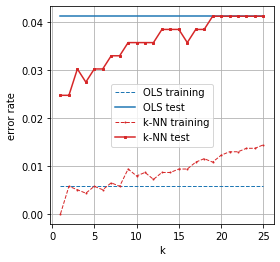

In [9]:
figWidth = 4
figHeight = 4

col1 = 'tab:blue'
col2 = 'tab:red'

lw_small = 1
lw_large = 1.5

ms_small = 1
ms_large = 2

style_1 = '-'
style_2 = '--'

fig = plt.figure(figsize=(figWidth,figHeight))
ax = fig.add_subplot(111)

ax.plot(ks, np.repeat(errors["OLS"]["training"], 25), color = col1, linestyle = style_2, linewidth = lw_small, markersize = ms_small, label='OLS training')
ax.plot(ks, np.repeat(errors["OLS"]["test"], 25), color = col1, linestyle = style_1, linewidth = lw_large, markersize = ms_large,  label='OLS test')
ax.plot(ks, np.array([errors[str(k) + "-NN"]["training"] for k in range(1, 26)]), color = col2, linestyle = style_2, linewidth = lw_small, marker='o', markersize = ms_small, label='k-NN training')
ax.plot(ks, np.array([errors[str(k) + "-NN"]["test"] for k in range(1, 26)]), color = col2, linestyle = style_1, linewidth = lw_large, marker='s',  markersize= ms_large, label='k-NN test')
ax.grid(True)

ax.set_xlabel('k')
ax.set_ylabel('error rate')
ax.legend()
plt.show()


In [10]:
ax.get_figure().savefig('../../notes/Figures/E2p8_A.pdf', bbox_inches='tight', pad_inches = 0)